In [1]:
from music21 import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History

from sklearn import  metrics
from help_plot import plot_decision_regions

Using TensorFlow backend.


Zacznijmy od prostego, dwuwymiarowego przypadku, dzięki któremu będziemy mogli przyglądnąć się naszym wynikom:

In [2]:
bach = pd.read_csv('bach.csv')
bach = bach[["liczby_nut", "dokladnosci_tonacji"]]
bach= bach.astype(float)

bach

,liczby_nut,dokladnosci_tonacji
0,214.0,0.907392
1,208.0,0.948021
2,228.0,0.958867
3,247.0,0.935147
4,199.0,0.972617
...,...,...
357,50.0,0.908990
358,45.0,0.791180
359,56.0,0.940300
360,860.0,0.930243


In [3]:
palestrina = pd.read_csv('palestrina.csv')
palestrina = palestrina[["liczby_nut", "dokladnosci_tonacji"]]
palestrina = palestrina.astype(float)

palestrina

,liczby_nut,dokladnosci_tonacji
0,587.0,0.876323
1,627.0,0.844736
2,513.0,0.865842
3,1065.0,0.904660
4,373.0,0.928705
...,...,...
1313,244.0,0.922416
1314,224.0,0.898357
1315,404.0,0.853625
1316,215.0,0.775142


In [4]:
ryans = pd.read_csv('ryans.csv')
ryans = ryans[["liczby_nut", "dokladnosci_tonacji"]]
ryans = ryans.astype(float)

ryans

,liczby_nut,dokladnosci_tonacji
0,192.0,0.852309
1,115.0,0.806914
2,136.0,0.723191
3,122.0,0.855020
4,131.0,0.818891
...,...,...
1054,67.0,0.778201
1055,109.0,0.885951
1056,115.0,0.785784
1057,78.0,0.910583


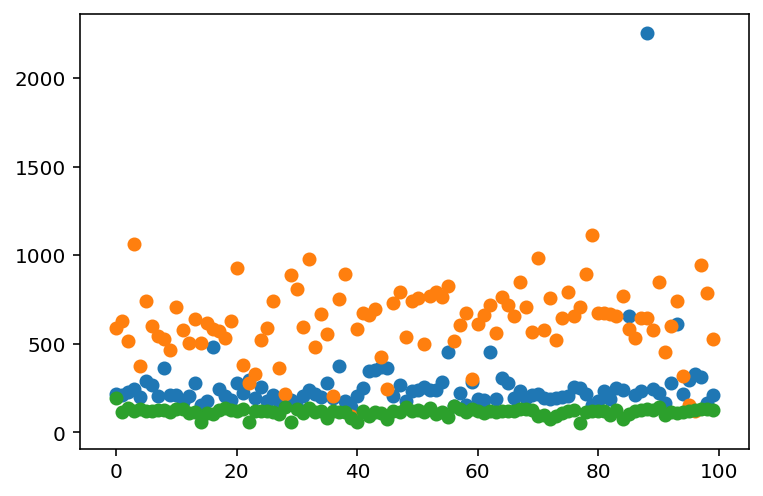

In [5]:
plt.scatter(np.arange(100), bach[:100]["liczby_nut"])
plt.scatter(np.arange(100), palestrina[:100]["liczby_nut"])
plt.scatter(np.arange(100), ryans[:100]["liczby_nut"])

plt.show()

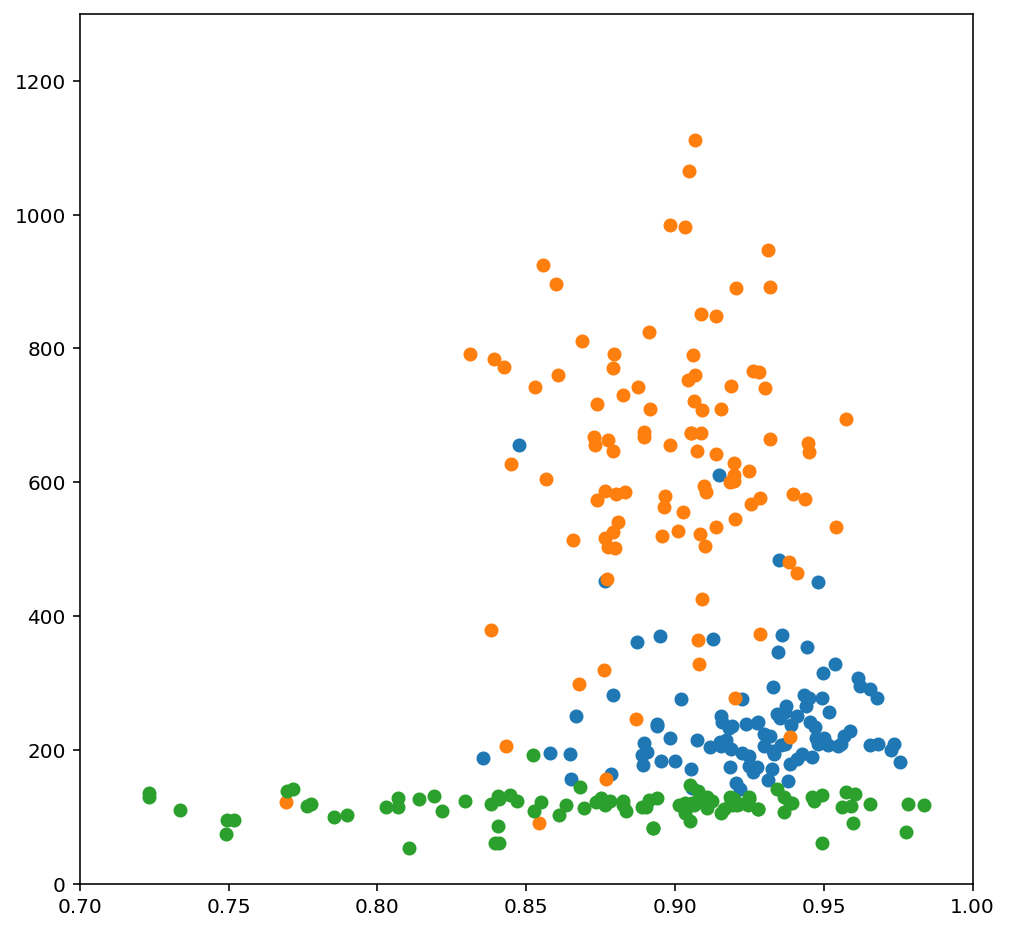

In [6]:
#plt.figure(figsize=(8,8));
#axes = plt.gca()
#axes.set_xlim([0,35])
#axes.set_ylim([0,1200])
#plt.scatter(bach[:100]["rozstawy_dzwiekow"], bach[:100]["liczby_nut"])
#plt.scatter(palestrina[:100]["rozstawy_dzwiekow"], palestrina[:100]["liczby_nut"])
#plt.scatter(ryans[:100]["rozstawy_dzwiekow"], ryans[:100]["liczby_nut"])

#plt.show()


plt.figure(figsize=(8,8));
axes = plt.gca()
axes.set_xlim([0.7,1])
axes.set_ylim([0,1300])
plt.scatter(bach[:100]["dokladnosci_tonacji"], bach[:100]["liczby_nut"])
plt.scatter(palestrina[:100]["dokladnosci_tonacji"], palestrina[:100]["liczby_nut"])
plt.scatter(ryans[:100]["dokladnosci_tonacji"], ryans[:100]["liczby_nut"])

plt.show()

Łączę dane w jedną DataFrame i dzielę na train i test:

In [7]:
X = bach.append(palestrina, ignore_index=True)
X = X.append(ryans, ignore_index = True)
y = [0]*362 + [1]*1318 + [2]*1059
X = np.array(X)
print(X.shape)
y = np.array(y)
print(y.shape)
X

(2739, 2)
(2739,)


array([[214.        ,   0.9073918 ],
       [208.        ,   0.9480214 ],
       [228.        ,   0.95886687],
       ...,
       [115.        ,   0.7857839 ],
       [ 78.        ,   0.91058297],
       [122.        ,   0.86997151]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Skalowanie danych:

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

1. Softmax Regression:

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(LogisticRegression(multi_class="multinomial",solver="lbfgs"), param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'C': 100}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.8679848132402878
0.8704379562043796
0.8657491273772036
0.8704379562043796


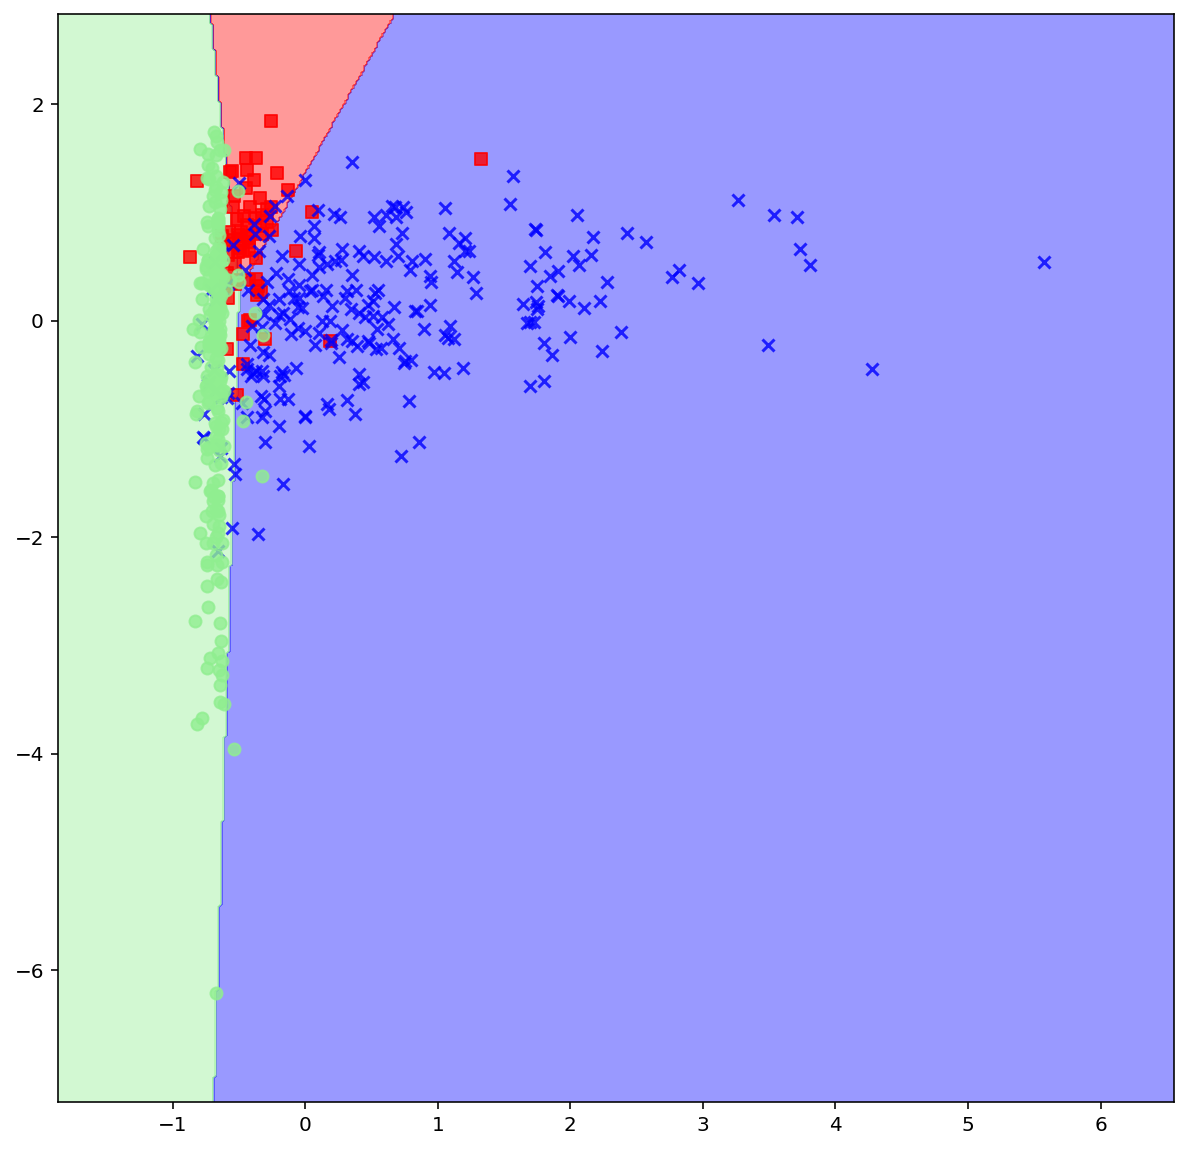

In [11]:
softmax = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42) 
softmax.fit(X_train, y_train)

model = softmax

print(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()

2. Decision Tree:

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


0.8435770621744597
0.8467153284671532
0.8448528736230247
0.8467153284671532


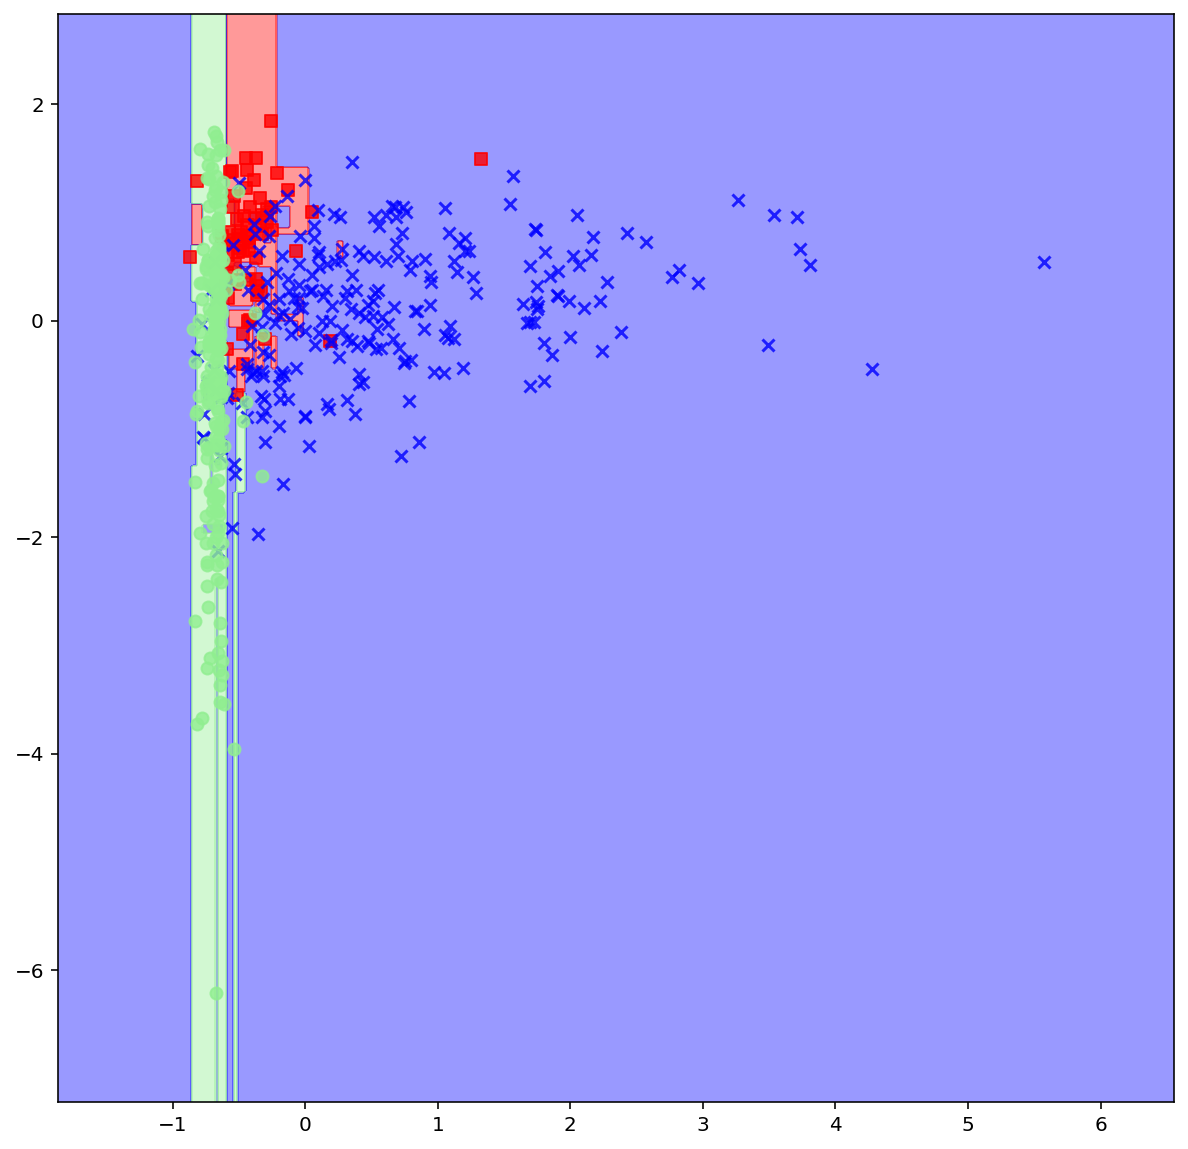

In [13]:
model = tree
print(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()



3. Random Forest:

0.8889973460920314
0.8905109489051095
0.889148793721932
0.8905109489051095


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


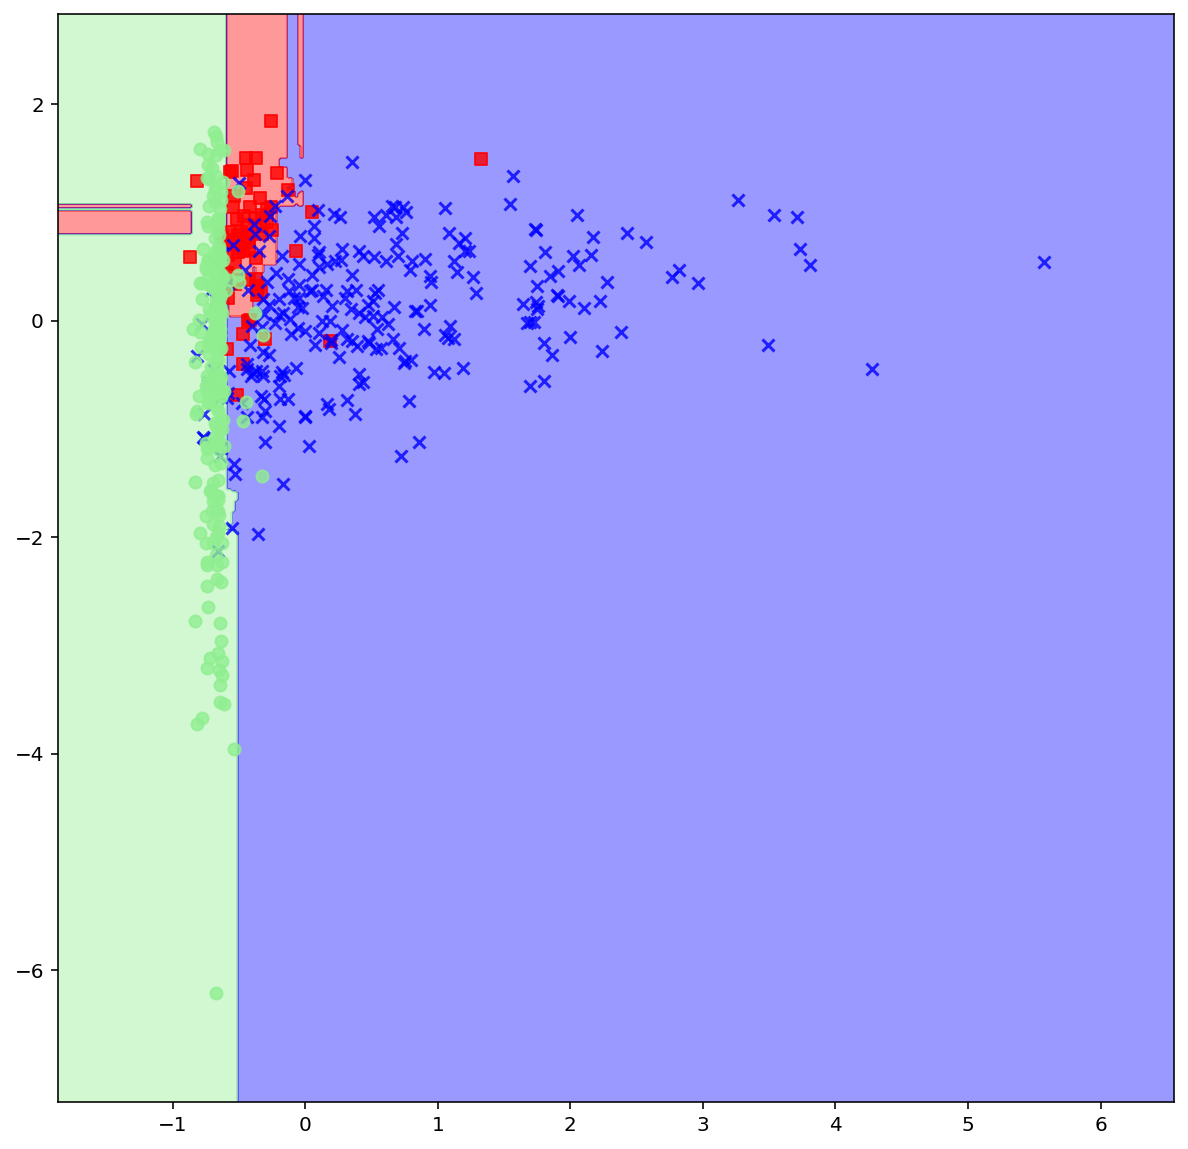

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_leaf_nodes=20, n_jobs=-1, random_state=42)
forest.fit(X_train, y_train)

model = forest

print(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 10))
plot_decision_regions(X_test, y_test, model)
plt.show()

Porównanie metod dla danych dwuwymiarowych:

In [15]:
models = [softmax, tree, forest]


precision = []
recall = []
f1 = []
accuracy = []


for model in models:
    precision.append(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
    recall.append(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
    f1.append(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
    accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))


d = {'precision': precision,
     'recall' : recall,
     'f1': f1,
     'accuracy': accuracy
    }

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=["softmax", "tree", "forest"])
df

,Method,precision,recall,f1,accuracy
0,softmax,0.867985,0.870438,0.865749,0.870438
1,tree,0.843577,0.846715,0.844853,0.846715
2,forest,0.888997,0.890511,0.889149,0.890511


WYKORZYSTUJEMY WSZYSTKIE DOSTĘPNE PARAMETRY:

Preprocessing:

In [16]:
bach = pd.read_csv('bach.csv')
palestrina = pd.read_csv('palestrina.csv')
ryans = pd.read_csv('ryans.csv')

In [17]:
bach["liczby_uzytych_metrum"].value_counts()
palestrina["liczby_uzytych_metrum"].value_counts()

1    1318
Name: liczby_uzytych_metrum, dtype: int64

In [18]:
bach["liczby_uzytych_tonacji"].value_counts()
palestrina["liczby_uzytych_tonacji"].value_counts()

1    1318
Name: liczby_uzytych_tonacji, dtype: int64

Dane z powyższych dwóch kolumn są nieprzydatne, więc ich nie ma sensu przetwarzać i nie będziemy ich brać pod uwagę.

In [19]:
bach = bach[["liczby_nut", "dokladnosci_tonacji", "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
bach= bach.astype(float)

palestrina = palestrina[["liczby_nut", "dokladnosci_tonacji" , "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
palestrina = palestrina.astype(float)

ryans = ryans[["liczby_nut", "dokladnosci_tonacji", "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"]]
ryans = ryans.astype(float)


X = bach.append(palestrina, ignore_index=True)
X = X.append(ryans, ignore_index = True)
print(X.isnull().sum())

liczby_nut                0
dokladnosci_tonacji       0
pauzy                     0
rozstawy_dzwiekow         0
najwyzsze_dzwieki      1059
najnizsze_dzwieki      1059
dtype: int64


Mamy missing data, więc dzielimy na train i test i pozbywamy się missing data. Mediana wydaje się w tym przypadku rozsądnym wyborem:

In [20]:
y = [0]*362 + [1]*1318 + [2]*1059
#X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train["najwyzsze_dzwieki"].median())
print(X_train["najnizsze_dzwieki"].median())

X_train.loc[X_train.najwyzsze_dzwieki.isnull(), "najwyzsze_dzwieki"] = 77.0
X_train.loc[X_train.najnizsze_dzwieki.isnull(), "najnizsze_dzwieki"] = 46.0
X_test.loc[X_test.najwyzsze_dzwieki.isnull(), "najwyzsze_dzwieki"] = 77.0
X_test.loc[X_test.najnizsze_dzwieki.isnull(), "najnizsze_dzwieki"] = 46.0
X.loc[X.najwyzsze_dzwieki.isnull(), "najwyzsze_dzwieki"] = 77.0
X.loc[X.najnizsze_dzwieki.isnull(), "najnizsze_dzwieki"] = 46.0

77.0
46.0


/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/dominika/miniconda2/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train

Modele dla pełnych danych:

Decision Tree:

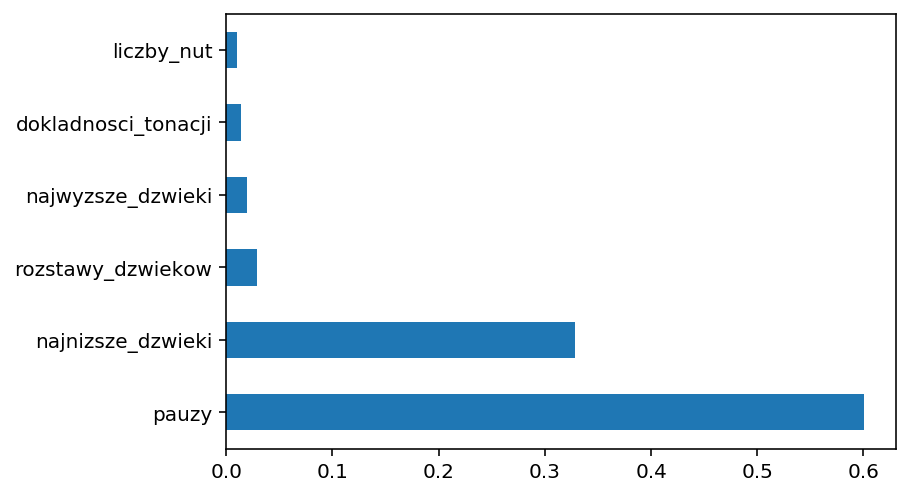

0.9858620184517172
0.9854014598540146
0.9855070540376792
0.9854014598540146


In [22]:
tree2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
tree2.fit(X_train, y_train)

feat_importances = pd.Series(tree2.feature_importances_, index = ["liczby_nut", "dokladnosci_tonacji" , "pauzy", "rozstawy_dzwiekow", "najwyzsze_dzwieki", "najnizsze_dzwieki"])
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

model = tree2

print(metrics.precision_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.recall_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.f1_score(y_test, model.predict(X_test), average = "weighted"))
print(metrics.accuracy_score(y_test, model.predict(X_test)))

Prosta sieć neuronowa:

In [23]:
history1 = History()
neural = Sequential()
neural.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
neural.add(Dense(10,activation="sigmoid"))
neural.add(Dense(3,activation="sigmoid"))
neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 1,743
Trainable params: 1,743
Non-trainable params: 0
_________________________________________________________________


In [24]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)

early_stopping = EarlyStopping(patience=20,monitor="val_loss")
neural.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
neural.fit(X_train, y_binary, validation_split=0.25,epochs=100,callbacks=[early_stopping, history1])


Train on 1643 samples, validate on 548 samples
Epoch 1/100
1643/1643 [==============================] - 0s 121us/step - loss: 1.0927 - categorical_accuracy: 0.3749 - val_loss: 1.0356 - val_categorical_accuracy: 0.4799
Epoch 2/100
1643/1643 [==============================] - 0s 41us/step - loss: 1.0117 - categorical_accuracy: 0.6932 - val_loss: 0.9893 - val_categorical_accuracy: 0.7847
Epoch 3/100
1643/1643 [==============================] - 0s 44us/step - loss: 0.9650 - categorical_accuracy: 0.7912 - val_loss: 0.9381 - val_categorical_accuracy: 0.7591
Epoch 4/100
1643/1643 [==============================] - 0s 42us/step - loss: 0.9085 - categorical_accuracy: 0.7906 - val_loss: 0.8809 - val_categorical_accuracy: 0.8047
Epoch 5/100
1643/1643 [==============================] - 0s 44us/step - loss: 0.8440 - categorical_accuracy: 0.8235 - val_loss: 0.8068 - val_categorical_accuracy: 0.8139
Epoch 6/100
1643/1643 [==============================] - 0s 47us/step - loss: 0.7575 - categorical_acc

Epoch 49/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.0504 - categorical_accuracy: 0.9921 - val_loss: 0.0923 - val_categorical_accuracy: 0.9763
Epoch 50/100
1643/1643 [==============================] - 0s 35us/step - loss: 0.0495 - categorical_accuracy: 0.9921 - val_loss: 0.0910 - val_categorical_accuracy: 0.9763
Epoch 51/100
1643/1643 [==============================] - 0s 32us/step - loss: 0.0490 - categorical_accuracy: 0.9927 - val_loss: 0.0907 - val_categorical_accuracy: 0.9781
Epoch 52/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.0475 - categorical_accuracy: 0.9933 - val_loss: 0.0910 - val_categorical_accuracy: 0.9763
Epoch 53/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.0472 - categorical_accuracy: 0.9921 - val_loss: 0.0899 - val_categorical_accuracy: 0.9781
Epoch 54/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.0459 - categorical_accuracy: 0.9933 - val_loss: 0.0892 - val_cat

Epoch 97/100
1643/1643 [==============================] - 0s 38us/step - loss: 0.0289 - categorical_accuracy: 0.9927 - val_loss: 0.0796 - val_categorical_accuracy: 0.9781
Epoch 98/100
1643/1643 [==============================] - 0s 33us/step - loss: 0.0282 - categorical_accuracy: 0.9939 - val_loss: 0.0779 - val_categorical_accuracy: 0.9799
Epoch 99/100
1643/1643 [==============================] - 0s 36us/step - loss: 0.0282 - categorical_accuracy: 0.9933 - val_loss: 0.0803 - val_categorical_accuracy: 0.9781
Epoch 100/100
1643/1643 [==============================] - 0s 34us/step - loss: 0.0277 - categorical_accuracy: 0.9933 - val_loss: 0.0784 - val_categorical_accuracy: 0.9781


Bardziej skomplikowana sieć neuronowa:

In [25]:
history2 = History()
neural2 = Sequential()
neural2.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
neural2.add(Activation("relu"))
neural2.add(BatchNormalization())
neural2.add(Dropout(0.2))
neural2.add(Activation("relu"))
neural2.add(BatchNormalization())
neural2.add(Dropout(0.2))
neural2.add(Dense(10,activation="sigmoid"))
neural2.add(Dense(3,activation="sigmoid"))
neural2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               700       
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

In [26]:
neural2.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
neural2.fit(X_train, y_binary, validation_split=0.25,epochs=100,callbacks=[early_stopping, history2])

Train on 1643 samples, validate on 548 samples
Epoch 1/100
1643/1643 [==============================] - 0s 290us/step - loss: 0.8628 - categorical_accuracy: 0.7212 - val_loss: 0.9574 - val_categorical_accuracy: 0.6515
Epoch 2/100
1643/1643 [==============================] - 0s 62us/step - loss: 0.6101 - categorical_accuracy: 0.9324 - val_loss: 0.7973 - val_categorical_accuracy: 0.8504
Epoch 3/100
1643/1643 [==============================] - 0s 53us/step - loss: 0.4875 - categorical_accuracy: 0.9574 - val_loss: 0.6666 - val_categorical_accuracy: 0.8522
Epoch 4/100
1643/1643 [==============================] - 0s 60us/step - loss: 0.4157 - categorical_accuracy: 0.9629 - val_loss: 0.5816 - val_categorical_accuracy: 0.8467
Epoch 5/100
1643/1643 [==============================] - 0s 59us/step - loss: 0.3537 - categorical_accuracy: 0.9647 - val_loss: 0.5033 - val_categorical_accuracy: 0.8595
Epoch 6/100
1643/1643 [==============================] - 0s 59us/step - loss: 0.2993 - categorical_acc

Epoch 49/100
1643/1643 [==============================] - 0s 58us/step - loss: 0.0457 - categorical_accuracy: 0.9884 - val_loss: 0.0523 - val_categorical_accuracy: 0.9872
Epoch 50/100
1643/1643 [==============================] - 0s 57us/step - loss: 0.0483 - categorical_accuracy: 0.9872 - val_loss: 0.0507 - val_categorical_accuracy: 0.9872
Epoch 51/100
1643/1643 [==============================] - 0s 57us/step - loss: 0.0332 - categorical_accuracy: 0.9927 - val_loss: 0.0500 - val_categorical_accuracy: 0.9872
Epoch 52/100
1643/1643 [==============================] - 0s 60us/step - loss: 0.0381 - categorical_accuracy: 0.9903 - val_loss: 0.0472 - val_categorical_accuracy: 0.9891
Epoch 53/100
1643/1643 [==============================] - 0s 55us/step - loss: 0.0312 - categorical_accuracy: 0.9933 - val_loss: 0.0494 - val_categorical_accuracy: 0.9891
Epoch 54/100
1643/1643 [==============================] - 0s 54us/step - loss: 0.0458 - categorical_accuracy: 0.9872 - val_loss: 0.0472 - val_cat

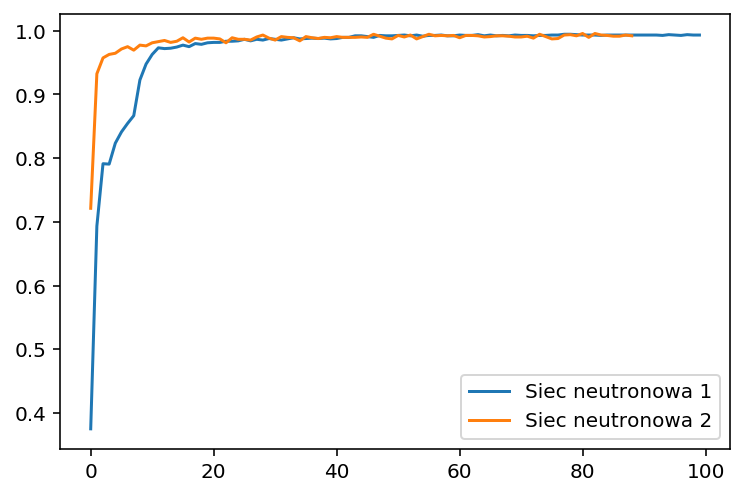

In [27]:
plt.plot(history1.history['categorical_accuracy'], label = "Siec neutronowa 1")
plt.plot(history2.history['categorical_accuracy'], label = "Siec neutronowa 2")

plt.legend()
plt.show()

Najszybciej nauczyła się sieć nr 2, spróbujmy wykorzystać ją do oszacowania przykładów zawartych w pdfach (0 - Bach, 1 - Palestrina, 2 - Ryans):

In [56]:
X = np.array(X)
X = scaler.transform(X)
neural2.predict_classes(X[[0,363,1681],:])


array([0, 1, 2])

Wszystkie trzy zostały sklasyfikowane poprawnie.

In [39]:
valid = neural2.predict_classes(X_test)==y_test
len(valid[valid == True])/len(valid)

0.9927007299270073